In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [3]:
np.random.seed(5)
data = np.random.normal(0, 1, 100) + np.linspace(0, 1, 100)
data[50] = 4

In [5]:
modelo = SimpleExpSmoothing(data)
model_fit = modelo.fit(smoothing_level = 0.2, optimized = False)

In [6]:
data_pred = model_fit.predict(0, len(data) - 1)

In [7]:
data_pred

array([ 0.44122749,  0.44122749,  0.28882816,  0.72125717,  0.53264792,
        0.45612111,  0.69149412,  0.38347003,  0.20259011,  0.21575435,
        0.1248113 , -0.11850186, -0.11355457, -0.13836702,  0.03626333,
       -0.27566421, -0.33026415, -0.00160988,  0.40452173,  0.05774511,
        0.21354943,  0.015122  , -0.11684878, -0.22341042, -0.21676528,
        0.07436059,  0.25247778,  0.26633632,  0.19495234,  0.2131853 ,
        0.20794801,  0.38557513,  0.24477204,  0.25922512,  0.25383324,
        0.26129183,  0.32958406,  0.37592654,  0.64245842,  0.57335929,
        0.84978177,  0.6994629 ,  0.54685232,  0.54247797,  0.59193876,
        0.61636238,  0.84239167,  0.99471123,  0.98960655,  0.82138769,
        0.73597718,  1.38878174,  1.25830652,  0.8495411 ,  0.64879054,
        0.51262069,  0.75164862,  0.69301741,  1.1215868 ,  1.14576505,
        1.06076532,  0.8826836 ,  1.02381506,  0.89616235,  0.67937791,
        0.7864218 ,  0.76300224,  0.98154727,  0.90587269,  0.29

In [8]:
anomalies = np.where(np.abs(data - data_pred) > 3 * np.std(data))[0]

In [9]:
anomalies

array([50])

In [10]:
data[anomalies]

array([4.])

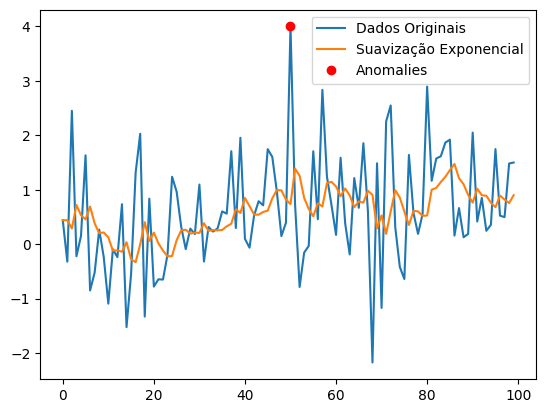

In [11]:
plt.plot(data, label = "Dados Originais")
plt.plot(data_pred, label = "Suavização Exponencial")
plt.plot(anomalies, data[anomalies], "ro", label = "Anomalies")
plt.legend()
plt.show()